In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CPSData.csv')
#df.head()
print(df.columns.values)
df.shape

['PeopleInHousehold' 'Region' 'State' 'MetroAreaCode' 'Age' 'Married' 'Sex'
 'Education' 'Race' 'Hispanic' 'CountryOfBirthCode' 'Citizenship'
 'EmploymentStatus' 'Industry']


(131302, 14)

# Problem 1

In [4]:
df.describe()

,PeopleInHousehold,MetroAreaCode,Age,Hispanic,CountryOfBirthCode
count,131302.000000,97064.000000,131302.000000,131302.000000,131302.000000
mean,3.284276,35074.709264,38.829226,0.139328,82.684079
std,1.700173,16551.637597,22.897130,0.346289,75.476511
min,1.000000,10420.000000,0.000000,0.000000,57.000000
25%,2.000000,21780.000000,19.000000,0.000000,57.000000
50%,3.000000,34740.000000,39.000000,0.000000,57.000000
75%,4.000000,41860.000000,57.000000,0.000000,57.000000
max,15.000000,79600.000000,85.000000,1.000000,555.000000


In [5]:
#df.info()
df.dtypes

PeopleInHousehold       int64
Region                 object
State                  object
MetroAreaCode         float64
Age                     int64
Married                object
Sex                    object
Education              object
Race                   object
Hispanic                int64
CountryOfBirthCode      int64
Citizenship            object
EmploymentStatus       object
Industry               object
dtype: object

In [6]:
df['Industry'].value_counts()

Educational and health services                15017
Trade                                           8933
Professional and business services              7519
Manufacturing                                   6791
Leisure and hospitality                         6364
Construction                                    4387
Financial                                       4347
Transportation and utilities                    3260
Other services                                  3224
Public administration                           3186
Information                                     1328
Agriculture, forestry, fishing, and hunting     1307
Mining                                           550
Armed forces                                      29
Name: Industry, dtype: int64

In [7]:
#df['State'].value_counts()
df['Citizenship'].value_counts(normalize =True)

Citizen, Native         0.888326
Non-Citizen             0.057806
Citizen, Naturalized    0.053868
Name: Citizenship, dtype: float64

In [8]:
df.loc[df['Hispanic']== 1,'Race'].value_counts()

White               16731
Black                 621
Multiracial           448
American Indian       304
Asian                 113
Pacific Islander       77
Name: Race, dtype: int64

# Problem 2

In [9]:
df.isnull().sum()

PeopleInHousehold         0
Region                    0
State                     0
MetroAreaCode         34238
Age                       0
Married               25338
Sex                       0
Education             25338
Race                      0
Hispanic                  0
CountryOfBirthCode        0
Citizenship               0
EmploymentStatus      25789
Industry              65060
dtype: int64

In [10]:
pd.crosstab(df['Region'],columns=df['Married'].isnull(),normalize='index')

Married,False,True
Region,,
Midwest,0.802014,0.197986
Northeast,0.826246,0.173754
South,0.808033,0.191967
West,0.795370,0.204630


In [11]:
pd.crosstab(df['Citizenship'],columns=df['Married'].isnull(),normalize='index')

Married,False,True
Citizenship,,
"Citizen, Native",0.788381,0.211619
"Citizen, Naturalized",0.976955,0.023045
Non-Citizen,0.935178,0.064822


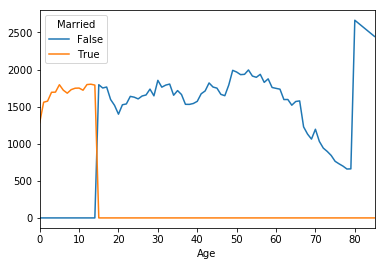

In [12]:
temp = pd.crosstab(df['Age'],columns=df['Married'].isnull())

temp.plot()

In [13]:
pd.crosstab(df['State'],columns=df['MetroAreaCode'].isnull(),normalize='index').sort_values(by=[1])

MetroAreaCode,False,True
State,,
Rhode Island,1.000000,0.000000
New Jersey,1.000000,0.000000
District of Columbia,1.000000,0.000000
California,0.979516,0.020484
Florida,0.960769,0.039231
Massachusetts,0.935078,0.064922
Maryland,0.930625,0.069375
New York,0.919392,0.080608
Connecticut,0.914316,0.085684


In [14]:
pd.crosstab(df['Region'],columns=df['MetroAreaCode'].isnull(),normalize='index')

MetroAreaCode,False,True
Region,,
Midwest,0.652131,0.347869
Northeast,0.783762,0.216238
South,0.762156,0.237844
West,0.756337,0.243663


# Problem 3

In [15]:
mac = pd.read_csv('MetroAreaCodes.csv')
cc = pd.read_csv('CountryCodes.csv')
mac.shape
cc.shape

(149, 2)

In [16]:
mac.columns = ['MetroAreaCode','MetroArea']
mac.head()

,MetroAreaCode,MetroArea
0,460,"Appleton-Oshkosh-Neenah, WI"
1,3000,"Grand Rapids-Muskegon-Holland, MI"
2,3160,"Greenville-Spartanburg-Anderson, SC"
3,3610,"Jamestown, NY"
4,3720,"Kalamazoo-Battle Creek, MI"


In [17]:
#df.iloc[222,:]

In [18]:
mac[mac['MetroAreaCode']==13820]

,MetroAreaCode,MetroArea
32,13820,"Birmingham-Hoover, AL"


In [19]:
df_mac = pd.merge(df, mac, how='left')
print(df_mac.shape)
print(df_mac['MetroArea'].isnull().sum())

(131302, 15)
34238


In [20]:
#df_mac.iloc[222,:]

In [21]:
df_mac['MetroArea'].value_counts()[:10]

New York-Northern New Jersey-Long Island, NY-NJ-PA    5409
Washington-Arlington-Alexandria, DC-VA-MD-WV          4177
Los Angeles-Long Beach-Santa Ana, CA                  4102
Philadelphia-Camden-Wilmington, PA-NJ-DE              2855
Chicago-Naperville-Joliet, IN-IN-WI                   2772
Providence-Fall River-Warwick, MA-RI                  2284
Boston-Cambridge-Quincy, MA-NH                        2229
Minneapolis-St Paul-Bloomington, MN-WI                1942
Dallas-Fort Worth-Arlington, TX                       1863
Houston-Baytown-Sugar Land, TX                        1649
Name: MetroArea, dtype: int64

In [22]:
pd.crosstab(df_mac['MetroArea'],columns=df['Hispanic'],normalize='index').sort_values(by=[1],ascending=False)[:5]

Hispanic,0,1
MetroArea,,
"Laredo, TX",0.033708,0.966292
"McAllen-Edinburg-Pharr, TX",0.051282,0.948718
"Brownsville-Harlingen, TX",0.202532,0.797468
"El Paso, TX",0.209016,0.790984
"El Centro, CA",0.313131,0.686869


In [23]:
temp = pd.crosstab(df_mac['MetroArea'],columns=df['Race']=='Asian',normalize='index').sort_values(by=[1],ascending=False)
sum(temp.iloc[:,1]>0.2)

4

In [24]:
df['Education'].unique()

array(['Associate degree', 'High school', 'No high school diploma',
       "Bachelor's degree", nan, 'Some college, no degree',
       'Doctorate degree', "Master's degree", 'Professional degree'], dtype=object)

In [31]:
pd.crosstab(df_mac['MetroArea'],columns=df['Education']=='No high school diploma',normalize='index').sort_values(by=[1],ascending=True)[:5]

Education,False,True
MetroArea,,
"Iowa City, IA",0.977099,0.022901
"Bowling Green, KY",0.965517,0.034483
"Kalamazoo-Portage, MI",0.960630,0.039370
"Champaign-Urbana, IL",0.959016,0.040984
"Bremerton-Silverdale, WA",0.954023,0.045977


# Problem 4

In [26]:
cc = pd.read_csv('CountryCodes.csv')
cc.columns = ['CountryOfBirthCode','Country']
cc.head()

,CountryOfBirthCode,Country
0,57,United States
1,66,Guam
2,73,Puerto Rico
3,78,U. S. Virgin Islands
4,96,Other U. S. Island Areas


In [27]:
df_cc = pd.merge(df_mac, cc, how='left')
print(df_cc.shape)
print(df_cc['Country'].isnull().sum())

(131302, 16)
176


In [28]:
df_cc['Country'].value_counts()[:3]

United States    115063
Mexico             3921
Philippines         839
Name: Country, dtype: int64

In [29]:
temp = df_cc['MetroArea']=='New York-Northern New Jersey-Long Island, NY-NJ-PA'

#df_cc.loc[temp,'Country'].value_counts()
skait = sum(df_cc.loc[temp,'Country']== 'United States')


vard = len(df_cc.loc[temp,'Country'])-sum(df_cc.loc[temp,'Country'].isnull())
print(1- float(skait)/vard)

0.308660251665


In [30]:
pd.crosstab(df_cc['MetroArea'],columns=df_cc['Country']=='Somalia').sort_values(by=[1],ascending=False)

Country,False,True
MetroArea,,
"Minneapolis-St Paul-Bloomington, MN-WI",1925,17
"St. Cloud, MN",75,7
"Seattle-Tacoma-Bellevue, WA",1248,7
"Phoenix-Mesa-Scottsdale, AZ",964,7
"Fargo, ND-MN",427,5
"Columbus, OH",546,5
"Portland-Vancouver-Beaverton, OR-WA",1086,3
"Burlington-South Burlington, VT",654,3
"Portland-South Portland, ME",698,3
